In [21]:
# Importing all required libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [23]:
# Set device

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [24]:
# Downloading dataset

In [5]:
transform = transforms.ToTensor()

batch_size = 8

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('T-shirt/top', 'Trouser/pants','Pullover shirt','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle boot')

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:06<00:00, 3955086.63it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 151866.31it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 3052870.78it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 2037583.94it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [25]:
# check the shape and label of dataset

In [10]:
train_iter = iter(trainset)

image, label = next(train_iter)

image.shape, label

(torch.Size([1, 28, 28]), 9)

In [26]:
# find the min and max color intensity of pixel in image

In [8]:
torch.min(image).item(), torch.max(image).item()

(0.0, 1.0)

In [27]:
# plot a image

Ankle boot


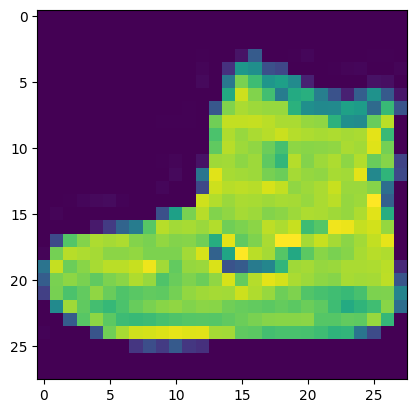

In [14]:
np_img = image.numpy()
print(classes[label])
plt.imshow(np_img.reshape((28, 28, 1)))

In [28]:
# find size of training and test dataset

len(trainset), len(testset)

(50000, 10000)

In [29]:
# train test split

In [16]:
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])
len(trainset), len(valset), len(testset)

(50000, 10000, 10000)

In [17]:
print(f'Number of batches in the training set: {int(50000 / batch_size)}')

Number of batches in the training set: 6250


In [18]:
print(f'Number of batches in the validation set: {int(10000 / batch_size)}')

Number of batches in the validation set: 1250


In [19]:
type(trainset)

torch.utils.data.dataset.Subset

In [30]:
# load dataset for model

In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [31]:
# Model Building

In [53]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        
        #Conv layers structures
        # conv2d
        #BatchNormalization
        #plooing
        #dropout
        
        # first layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3)
        self.batch_norm1 = nn.BatchNorm2d(256)
        self.pool1 = nn.MaxPool2d(2,2)
        
        #second layer
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.batch_norm2 = nn.BatchNorm2d(512)
        self.pool2 = nn.MaxPool2d(2,2)
        self.drop2 = nn.Dropout(0.3)
        
        # third layer
        self.conv3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3)
        self.batch_norm3 = nn.BatchNorm2d(512)
        self.pool3 = nn.MaxPool2d(2,2)
        
        # flatten
        self.flatten = nn.Flatten()
        
        # Dense layres
        self.fc1 = nn.Linear(in_features=512, out_features=228)
        self.fc1_drop = nn.Dropout(p=0.2)
        
        self.out = nn.Linear(in_features=228, out_features=10)
        
    def forward(self, x):
        
        #pass throught first step
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.pool1(x)
        
        #second step
        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.pool2(x)
        x = self.drop2(x)
        
        #third step
        x = F.relu(self.conv3(x))
        x = self.batch_norm3(x)
        x = self.pool3(x)
        
        #pass through flatten
        x = self.flatten(x)
        
        # moves to first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        
        #final output
        x = self.out(x)
        
        return x

In [54]:
# model initilization

In [55]:
cnn_net = CNNNet()
cnn_net.to(device)

CNNNet(
  (conv1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.3, inplace=False)
  (conv3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=512, out_features=228, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=228, out_features=10, bias=True)

In [56]:
num_params = 0
for x in cnn_net.parameters():
    num_params += len(torch.flatten(x))

print(f'Number of parameters in the model: {num_params:,}')

Number of parameters in the model: 3,664,342


In [57]:
for i, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)
    print(f'input shape: {inputs.shape}')
    print(f'after network shape: {cnn_net(inputs).shape}')
    break

input shape: torch.Size([8, 1, 28, 28])
after network shape: torch.Size([8, 10])
